In [33]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
# Read the shapefile
police_district_df = gpd.read_file("boston-massachusetts-police-districts.shp")

# Print the first few rows of the GeoDataFrame
print(police_district_df)

    DISTRICT_1 DISTRICT DISTRICT_2        STArea BPDGIS_GIS   ID  \
0          1.0       A1         01  4.445582e+07          A   A1   
1          6.0       C6         06  1.237108e+08          C   C6   
2          4.0       D4         04  7.000553e+07          D   D4   
3         14.0      D14         14  1.236253e+08          D  D14   
4         13.0      E13         13  1.119417e+08          E  E13   
5          5.0       E5         05  1.910675e+08          E   E5   
6          3.0       B3         03  9.315668e+07          B   B3   
7         18.0      E18         18  1.632845e+08          E  E18   
8          2.0       B2         02  1.196784e+08          B   B2   
9         15.0      A15         15  3.798284e+07          A  A15   
10         7.0       A7         07  1.401151e+08          A   A7   
11        11.0      C11         11  1.329178e+08          C  C11   

         STLength                                           geometry  
0    49080.786370  POLYGON ((777233.200 2959

In [36]:
print("police_district_df shape: ", police_district_df.shape)
print("police_district_df cordinate reference system: ",police_district_df.crs)

police_district_df shape:  (12, 8)
police_district_df cordinate reference system:  EPSG:2249


0      Annotation(774774, 2.95581e+06, 'A1')
1      Annotation(779515, 2.94735e+06, 'C6')
2      Annotation(768815, 2.95072e+06, 'D4')
3     Annotation(751949, 2.95346e+06, 'D14')
4     Annotation(760368, 2.93752e+06, 'E13')
5      Annotation(749942, 2.92799e+06, 'E5')
6      Annotation(767912, 2.92856e+06, 'B3')
7     Annotation(757735, 2.91985e+06, 'E18')
8      Annotation(767499, 2.94185e+06, 'B2')
9     Annotation(774029, 2.96355e+06, 'A15')
10     Annotation(787990, 2.96071e+06, 'A7')
11    Annotation(777341, 2.93343e+06, 'C11')
dtype: object

<Figure size 640x480 with 0 Axes>

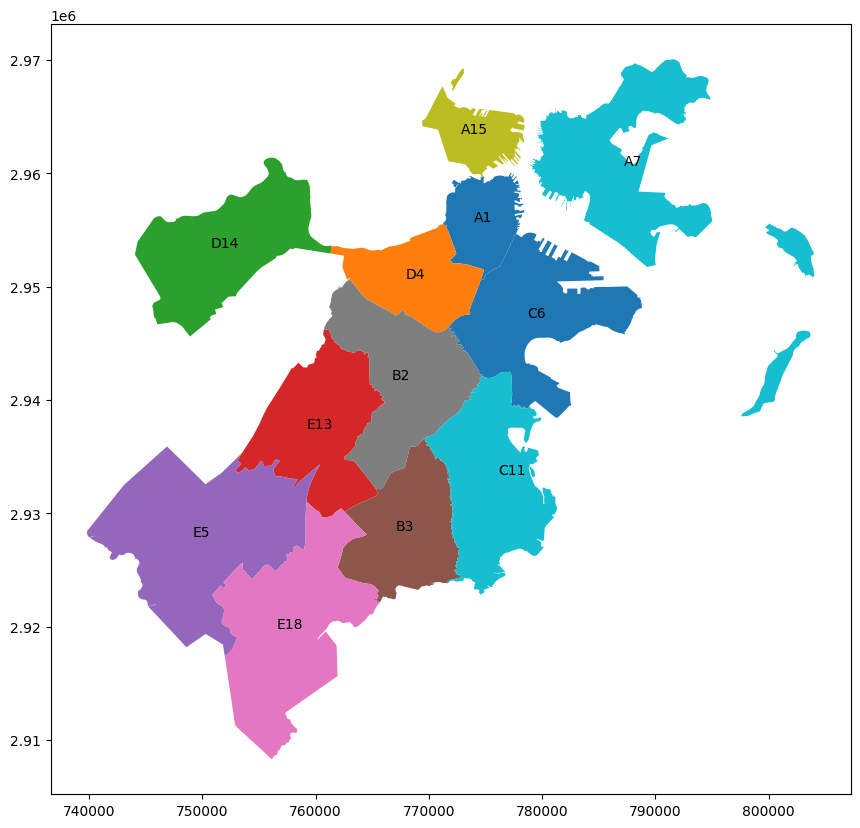

In [37]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(20, 10))
police_district_df.plot(ax=ax, column='geometry')
police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

In [38]:
# Read the shapefile
city_council_district_df = gpd.read_file("City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp")

# Print the first few rows of the GeoDataFrame
print(city_council_district_df)

   FID    LONGNAME SHORTNAME  DISTRICT       COLOR  TOTAL  TARGET_DEV  \
0    1  District 1        D1         1  -851848832  76830        1758   
1    2  District 2        D2         2   465990528  77466        2394   
2    3  District 3        D3         3   494969216  73285       -1787   
3    4  District 4        D4         4      -65408  72917       -2155   
4    5  District 5        D5         5   412292224  75436         364   
5    6  District 6        D6         6  1971620992  76523        1451   
6    7  District 7        D7         7  1946148736  72147       -2925   
7    8  District 8        D8         8   639511936  76370        1298   
8    9  District 9        D9         9  -119742707  74673        -399   

   TARGET_D_1  TOTAL18  TOTALHISP  ...  BLACK  AIAN  ASIAN  HPI  OTHER  MLTMN  \
0        2.34    64257      24552  ...   3637   783   5080   50  20935   1689   
1        3.19    70183       6640  ...   4520   269  13604   55   4893   1005   
2       -2.38    60834    

In [39]:
print("city_council_district_df shape: ", city_council_district_df.shape)
print("city_council_district_df coordinate reference system: ",city_council_district_df.crs)

city_council_district_df shape:  (9, 38)
city_council_district_df coordinate reference system:  EPSG:4326


In [40]:
# reproject the coordinate system to police district coordinate system
city_council_district_df = city_council_district_df.to_crs("EPSG:2249")

0    Annotation(784827, 2.95999e+06, 'D1')
1    Annotation(783206, 2.94961e+06, 'D2')
2    Annotation(811439, 2.95211e+06, 'D3')
3    Annotation(771203, 2.92994e+06, 'D4')
4     Annotation(758424, 2.9219e+06, 'D5')
5    Annotation(753316, 2.93202e+06, 'D6')
6    Annotation(767892, 2.94193e+06, 'D7')
7    Annotation(767164, 2.95244e+06, 'D8')
8     Annotation(751872, 2.9536e+06, 'D9')
dtype: object

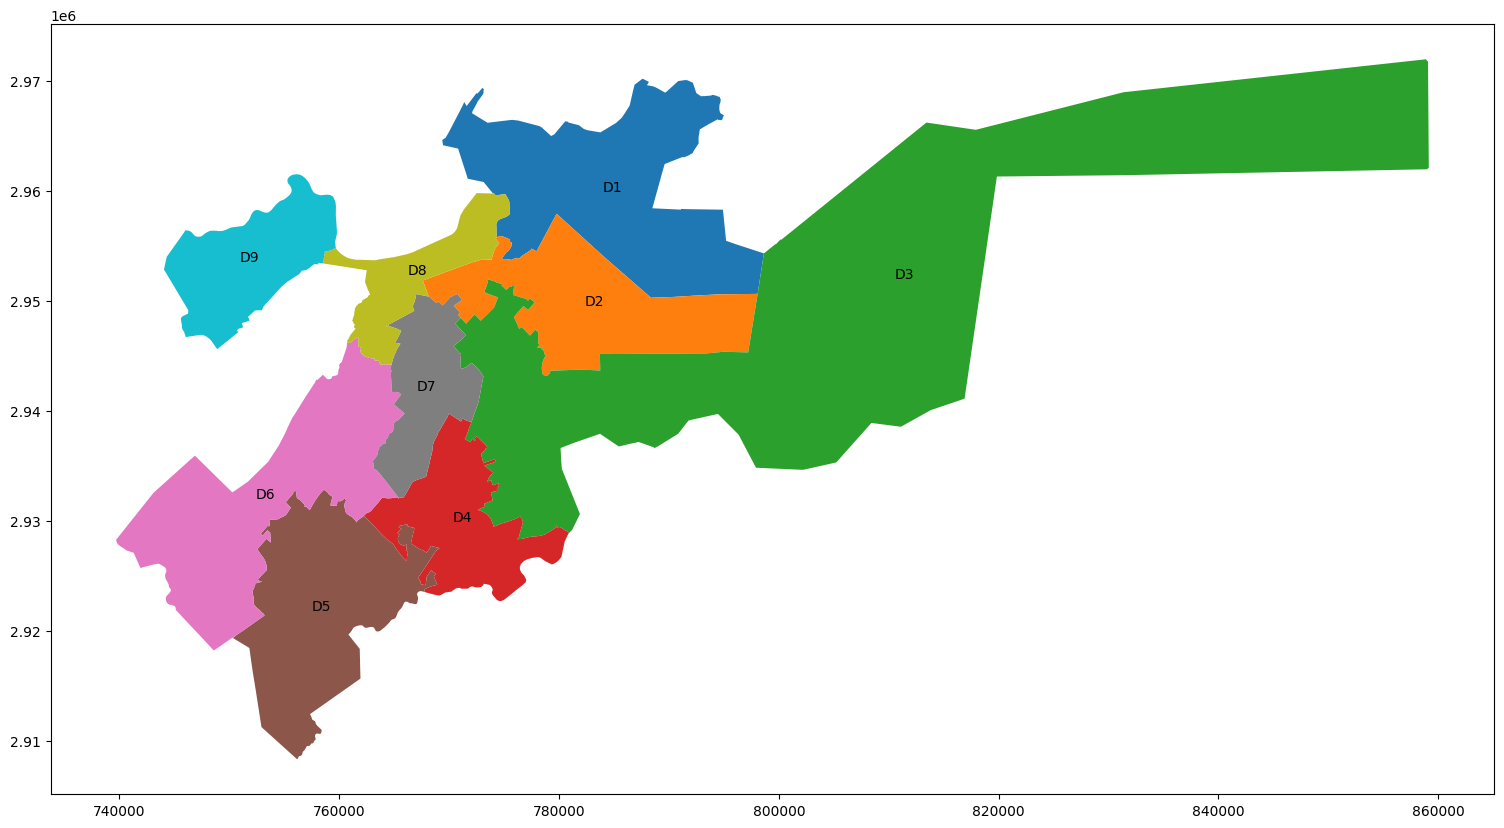

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
city_council_district_df.plot(ax=ax, column='geometry')
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

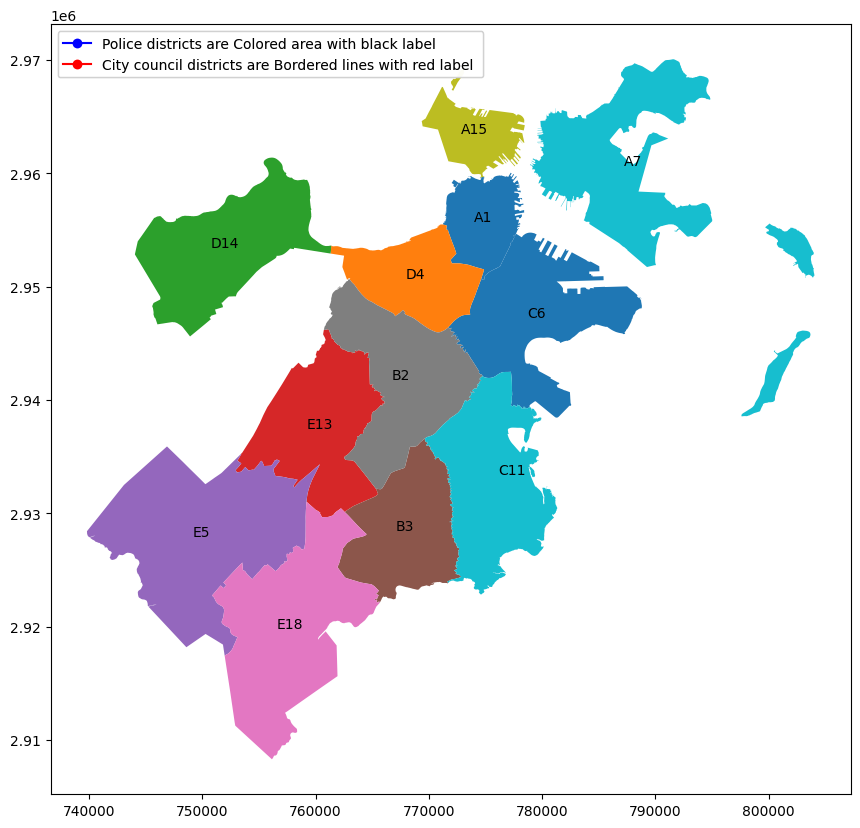

In [42]:
from matplotlib.lines import Line2D    
'''Plotting both police district and city councli on one figure'''

# fig, ax = plt.subplots(figsize=(20, 10))

# Plot gdf
# police_district_df.plot(ax=ax, column='geometry')
# police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# # Plot gdf1 on the same axis
# city_council_district_df.plot(ax=ax, column='geometry')
# city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# plt.show()

'''
#  Plotting both police district and city councli on one figure
#  Police districts are displayed using colored area
#  City council are displayed using boundry lines
'''
fig, ax = plt.subplots(figsize=(20, 10))

# Plot police districts
police_district_plot = police_district_df.plot(ax=ax, column='geometry', label="Police Districts")
police_district_df.apply(lambda x: ax.annotate(text=x['DISTRICT'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)



# Add legend

legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Police districts are Colored area with black label '),
                  Line2D([0], [0], marker='o', color='red', label='City council districts are Bordered lines with red label ')]
legend = ax.legend(handles=legend_elements, loc='upper left')

# Add the legend to the plot
ax.add_artist(legend)

plt.show()



## Questions

1. According to above figure there are 12 police districs and 9 city council districts. And D4 for police district and D4 of city council district are different zones. Is this correct?


# Shots fired and Shootings data

In [ ]:
import folium
import pandas as pd

In [ ]:
shootings_df = pd.read_csv("Shootings.csv")

In [ ]:
shots_fired_df = pd.read_csv("Shots_fired.csv")

In [ ]:
shootings_df.head()

In [ ]:
shots_fired_df.head()

In [ ]:
Nonfatal_shootings_df = shootings_df[shootings_df['shooting_type_v2'] == 'Non-Fatal']
fatal_shootings_df = shootings_df[shootings_df['shooting_type_v2'] == 'Fatal']

In [ ]:
Nonfatal_shootings_df.head()

In [ ]:
fatal_shootings_df.head()

In [ ]:
Nonfatalcounts = Nonfatal_shootings_df.groupby(['victim_race', 'victim_gender']).size()
print(Nonfatalcounts)

fatalcounts = fatal_shootings_df.groupby(['victim_race', 'victim_gender']).size()
print(fatalcounts)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by district, victim race, victim gender, and shooting type, and count the number of occurrences
grouped = shootings_df.groupby(['district', 'victim_race', 'victim_gender', 'shooting_type_v2']).size().reset_index(name='count')

# define custom column titles
custom_col_titles = ['Male', 'Female']

# create the subplots with custom column titles
g = sns.catplot(x='district', y='count', hue='victim_race', col='victim_gender', row='shooting_type_v2', data=grouped, kind='bar', height=3, aspect=1.2, col_order=custom_col_titles)

# set the titles
g.set_titles("{row_name} - {col_name}")

# set the axis labels
g.set_axis_labels("District", "Count")

# rotate the x-axis labels
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation=90)

# adjust the plot layout
g.tight_layout()

# save the plot as a PNG file
g.savefig("shooting_plot.png")


In [ ]:

Shots_shootings_df = pd.merge(shootings_df, shots_fired_df, on="incident_num")
Shots_shootings_df.head()

In [ ]:
diff_districts = (Shots_shootings_df['district_x'] != Shots_shootings_df['district_y'])
num_diff_districts = diff_districts.sum()
print(f"Number of columns where district_x and district_y are different: {num_diff_districts}")


In [ ]:
Shots_shootings_df = Shots_shootings_df[~diff_districts]

In [ ]:
Shots_shootings_df.head()

In [ ]:
Shots_shootings_df["district_x"].unique()

In [ ]:
import seaborn as sns
import pandas as pd

# merge the two dataframes based on the police district column
merged_df1 = pd.merge(police_district_df, Shots_shootings_df, left_on='DISTRICT', right_on='district_x')

# count the number of incidents in each police district
district_counts = merged_df1.groupby('DISTRICT')['incident_num_y'].count().reset_index()
district_counts.columns = ['DISTRICT', 'count']

# create a heatmap using seaborn
sns.set(style='whitegrid')
sns.heatmap(police_district_df.merge(district_counts, on='DISTRICT')[['DISTRICT', 'count']].pivot(index='DISTRICT', columns='count', values='count'), cmap='Reds', annot=True, fmt='g', linewidths=.5)


In [ ]:
merged_df2 = police_district_df.merge(Shots_shootings_df.groupby('district_x').count()[['incident_num']], 
                                     left_on='DISTRICT', right_index=True, how='left')


fig, ax = plt.subplots(figsize=(20, 20))

merged_df2.plot(column='incident_num_y', cmap='Reds', linewidth=0, edgecolor='black', ax=ax, legend=True)

# Add district labels
merged_df2['coords'] = merged_df2['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df2['coords'] = [coords[0] for coords in merged_df2['coords']]
# for idx, row in merged_df2.iterrows():
#     plt.annotate(text=row['DISTRICT'], xy=row['coords'], horizontalalignment='center')
    

# Plot city council districts
city_council_district_plot = city_council_district_df.plot(ax=ax, facecolor='none', edgecolor='black', label="City Council Districts")
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center', color='red'), axis=1)


ax.set_title('Shooting Incidents by city council District in Boston')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.savefig('shooting_incidents_by_district.png', dpi=300)
plt.show()





In [ ]:
police_district_df.head()

# FIO dataset info

In [10]:
police_district_df.head()

,DISTRICT_1,DISTRICT,DISTRICT_2,STArea,BPDGIS_GIS,ID,STLength,geometry
0,1.0,A1,01,4.445582e+07,A,A1,49080.786370,"POLYGON ((777233.200 2959748.000, 777315.300 2..."
1,6.0,C6,06,1.237108e+08,C,C6,93582.798497,"POLYGON ((779407.000 2954363.800, 779390.500 2..."
2,4.0,D4,04,7.000553e+07,D,D4,41040.347429,"POLYGON ((771263.359 2955490.741, 771418.507 2..."
3,14.0,D14,14,1.236253e+08,D,D14,58025.031627,"POLYGON ((757306.200 2960067.100, 757313.100 2..."
4,13.0,E13,13,1.119417e+08,E,E13,66503.441590,"POLYGON ((761108.914 2946218.155, 761125.252 2..."


In [14]:
fieldContact_df = pd.read_csv("fio-records-2022-mark43-fieldcontact-table.csv")
fieldContactName_df = pd.read_csv("fio-records-2022-mark43-fieldcontact_name-table.csv")

In [15]:
fieldContact_df.head()

,fc_num,contact_date,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,basis,vehicle_year,vehicle_state,vehicle_model,vehicle_color,vehicle_style,vehicle_type,key_situations,contact_reason,weather
0,FC22000008,2022-01-01 00:00:00,151206,"WATTY-NILES, CREFTON",11586,CHRISTOPHER CARROLL,ALBANY ST,BOSTON,MA,2118,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01/01/2022 11:40 PM\n\nOfficers responded to a...,NaN
1,FC22000001,2022-01-01 02:30:00,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,BOSTON,MA,2122,...,Probable Cause,2008.0,MA,Taurus,Brown,"4 Door, Sedan",Passenger Car/ Automobile,NaN,"About 02:30am, Officers assisted State Police ...",NaN
2,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Encounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:00AM, Saturday 1/1/21 Officers respon...",NaN
3,FC22000003,2022-01-01 10:16:00,162319,"Uhrig, Robert",9266,STEVEN CICCOLO,E EIGHTH ST,SOUTH BOSTON,MA,2127,...,Reasonable Suspicion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"About 10:16am on Saturday, 01/01/22, Officers ...",NaN
4,FC22000005,2022-01-01 10:29:00,100417,"FLYNN, THOMAS",11212,MICHAEL MCCARTHY,ROBINSON ST,DORCHESTER,MA,2122,...,Probable Cause,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Officers responded to a radio call for a B&E t...,NaN


In [16]:
fieldContactName_df.head()

,person_id,contact_date,fc_num,sex,race,age,build,hair_style,ethnicity,skin_tone,deceased,license_type,license_state,was_frisked
0,30750626451,2022-01-01 00:00:00.0000000,FC22000008,Male,Black,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0
1,30745256091,2022-01-01 02:30:00.0000000,FC22000001,Male,Black,25.0,Thin,Short,Not of Hispanic Origin,Brown,0,Personal Driver License,MA,1.0
2,30747685932,2022-01-01 09:29:00.0000000,FC22000004,Male,Black,39.0,Medium,Bald or Balding,Not of Hispanic Origin,Medium Brown,0,Class D,MA,1.0
3,30747687157,2022-01-01 09:29:00.0000000,FC22000004,Female,Black,35.0,NaN,NaN,Not of Hispanic Origin,NaN,0,Class D,MA,NaN
4,30747589299,2022-01-01 10:16:00.0000000,FC22000003,Male,White,54.0,Medium,NaN,Not of Hispanic Origin,NaN,0,NaN,NaN,0.0


In [17]:
print(fieldContact_df.shape)
print(fieldContactName_df.shape)

(5278, 22)
(9408, 14)


In [18]:
print(len(fieldContact_df['fc_num'].unique()))
print(len(fieldContactName_df['fc_num'].unique()))

5124
5254


In [19]:
# Merging both field contact and field contact name dataframes
fio_df = pd.merge(fieldContact_df, fieldContactName_df, how='inner', left_on = 'fc_num', right_on = 'fc_num')

In [20]:
fio_df.shape

(9458, 35)

In [21]:
fio_df.head()

,fc_num,contact_date_x,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,race,age,build,hair_style,ethnicity,skin_tone,deceased,license_type,license_state,was_frisked
0,FC22000008,2022-01-01 00:00:00,151206,"WATTY-NILES, CREFTON",11586,CHRISTOPHER CARROLL,ALBANY ST,BOSTON,MA,2118,...,Black,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0
1,FC22000001,2022-01-01 02:30:00,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,BOSTON,MA,2122,...,Black,25.0,Thin,Short,Not of Hispanic Origin,Brown,0,Personal Driver License,MA,1.0
2,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Black,39.0,Medium,Bald or Balding,Not of Hispanic Origin,Medium Brown,0,Class D,MA,1.0
3,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,Black,35.0,NaN,NaN,Not of Hispanic Origin,NaN,0,Class D,MA,NaN
4,FC22000003,2022-01-01 10:16:00,162319,"Uhrig, Robert",9266,STEVEN CICCOLO,E EIGHTH ST,SOUTH BOSTON,MA,2127,...,White,54.0,Medium,NaN,Not of Hispanic Origin,NaN,0,NaN,NaN,0.0


In [22]:
Zip_PD_A1 =[2108, 2109, 2110, 2111, 2113, 2114, 2116, 2129, 2199 ]
Zip_PD_A7 = [2121, 2122, 2124, 2125]
Zip_PD_A15 = [2130, 2131, 2132]
Zip_PD_B2 = [ 2119, 2120, 2126, 2130]
Zip_PD_B3 = [2124, 2125, 2126, 2131, 2136, 2186]
Zip_PD_C6 = [2127, 2210]
Zip_PD_C11 = [2124, 2125, 2136, 2186]
Zip_PD_D4 = [2115, 2116, 2118, 2119, 2120, 2130, 2199]
Zip_PD_D14 = [2128]
Zip_PD_E5 = [2130, 2131, 2132, 2136, 2467]
Zip_PD_E13 = [ 2130, 2131, 2132, 2136]
Zip_PD_E18 = [ 2126, 2136, 2186]


In [24]:
def get_district(zip_code):
    if zip_code in Zip_PD_A1:
        return 'A1'
    elif zip_code in Zip_PD_A7:
        return 'A7'
    elif zip_code in Zip_PD_A15:
        return 'A15'
    elif zip_code in Zip_PD_B2:
        return 'B2'
    elif zip_code in Zip_PD_B3:
        return 'B3'
    elif zip_code in Zip_PD_C6:
        return 'C6'
    elif zip_code in Zip_PD_C11:
        return 'C11'
    elif zip_code in Zip_PD_D4:
        return 'D4'
    elif zip_code in Zip_PD_D14:
        return 'D14'
    elif zip_code in Zip_PD_E5:
        return 'E5'
    elif zip_code in Zip_PD_E13:
        return 'E13'
    elif zip_code in Zip_PD_E18:
        return 'E18'
    else:
        return 'Unknown'
    
fio_df['District'] = fio_df['zip'].apply(get_district)


In [28]:
fio_df.head()

,fc_num,contact_date_x,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,age,build,hair_style,ethnicity,skin_tone,deceased,license_type,license_state,was_frisked,District
0,FC22000008,2022-01-01 00:00:00,151206,"WATTY-NILES, CREFTON",11586,CHRISTOPHER CARROLL,ALBANY ST,BOSTON,MA,2118,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,D4
1,FC22000001,2022-01-01 02:30:00,153132,"VILLEGAS-HOAG, STEPHANIE",11212,MICHAEL MCCARTHY,NaN,BOSTON,MA,2122,...,25.0,Thin,Short,Not of Hispanic Origin,Brown,0,Personal Driver License,MA,1.0,A7
2,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,39.0,Medium,Bald or Balding,Not of Hispanic Origin,Medium Brown,0,Class D,MA,1.0,B2
3,FC22000004,2022-01-01 09:29:00,148290,"PARHAM, ANTHONY",10845,JAMES MOORE,BRIARCLIFF,MATTAPAN,MA,2126,...,35.0,NaN,NaN,Not of Hispanic Origin,NaN,0,Class D,MA,NaN,B2
4,FC22000003,2022-01-01 10:16:00,162319,"Uhrig, Robert",9266,STEVEN CICCOLO,E EIGHTH ST,SOUTH BOSTON,MA,2127,...,54.0,Medium,NaN,Not of Hispanic Origin,NaN,0,NaN,NaN,0.0,C6


In [26]:
fio_df[fio_df['District']=='Unknown']['zip'].unique()

array([2215, 2134, 2135, 2026, 2909, 2472, 2492, 2139, 1970, 2446, 2050,
       2203, 2151, 2302, 2465, 2201, 1890, 2458, 2169, 2081, 2452],
      dtype=int64)

In [27]:
fio_df[fio_df['District']=='Unknown'].head()

,fc_num,contact_date_x,contact_officer,contact_officer_name,supervisor,supervisor_name,street,city,state,zip,...,age,build,hair_style,ethnicity,skin_tone,deceased,license_type,license_state,was_frisked,District
43,FC22000030,2022-01-05 08:40:00,102399,"SPARROW, DANIEL",9021,THOMAS HOPKINS,BOYLSTON ST,BOSTON,MA,2215,...,39.0,Muscular,NaN,Not of Hispanic Origin,NaN,0,"ID - Had a License, now has ID",MA,0.0,Unknown
63,FC22000047,2022-01-07 01:00:00,157665,"MARIAM, DANIEL",9021,THOMAS HOPKINS,JERSEY ST,BOSTON,MA,2215,...,19.0,NaN,NaN,Not of Hispanic Origin,NaN,0,NaN,NaN,1.0,Unknown
64,FC22000047,2022-01-07 01:00:00,157665,"MARIAM, DANIEL",9021,THOMAS HOPKINS,JERSEY ST,BOSTON,MA,2215,...,19.0,NaN,NaN,Not of Hispanic Origin,NaN,0,Class D,MA,0.0,Unknown
82,FC22000062,2022-01-08 18:30:00,148287,"MONAHAN, SEAN",11808,NANCY CELLUCCI,BOYLSTON ST,BOSTON,MA,2215,...,31.0,Thin,NaN,Not of Hispanic Origin,NaN,0,NaN,MA,0.0,Unknown
135,FC22000088,2022-01-11 16:44:00,148260,"EGAN, RYAN",80394,SEAN WILBANKS,BRIGHTON AVE,BRIGHTON,MA,2134,...,37.0,Medium,NaN,Not of Hispanic Origin,NaN,0,NaN,NaN,0.0,Unknown


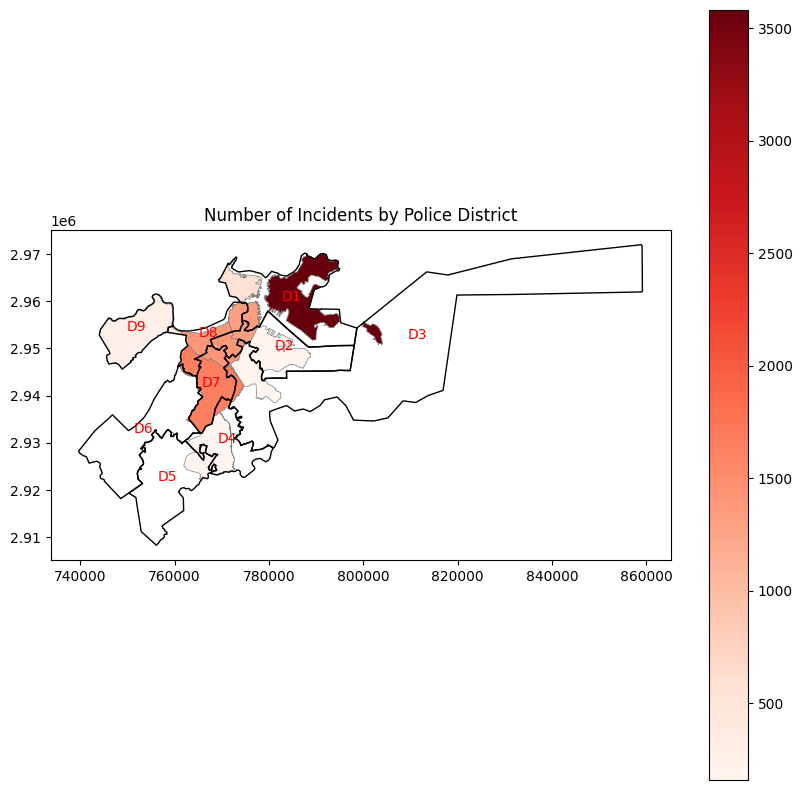

In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Merge the two dataframes based on the "District" and "DISTRICT" columns
merged_df = pd.merge(fio_df, police_district_df, left_on='District', right_on='DISTRICT')

# Group the merged dataframe by the "DISTRICT" column and count the number of incidents for each district
district_counts = merged_df.groupby('DISTRICT')['fc_num'].count().reset_index()

# Create a geopandas dataframe from the police_district_df dataframe
district_map = gpd.GeoDataFrame(police_district_df)

# Merge the district_counts dataframe with the district_map dataframe based on the "DISTRICT" column
district_map = pd.merge(district_map, district_counts, on='DISTRICT')

# Create a choropleth map of the number of incidents in each district
fig, ax = plt.subplots(figsize=(10,10))
district_map.plot(column='fc_num', cmap='Reds', linewidth=0.5, edgecolor='grey', legend=True, ax=ax)

# Plot city council districts
city_council_district_plot = city_council_district_df.plot(ax=ax, facecolor='none', edgecolor='black', label="City Council Districts")
city_council_district_df.apply(lambda x: ax.annotate(text=x['SHORTNAME'], xy=x.geometry.centroid.coords[0], ha='center', color='red'), axis=1)


# Add a title to the map
plt.title('Number of Incidents by Police District')
plt.show()
